## 📍 **KNN**

Neste documento, estamos utilizando os dados pré-processados para realizar a classificação do dataframe `'census.csv'` por meio do algoritmo KNN.

### 📍 **Importação de Bibliotecas, Módulos e Variáveis essenciais**


In [2]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [5]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42090, 41), (42090,))

In [6]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4881, 41), (4881,))

In [7]:
knn_census_smote = KNeighborsClassifier(n_neighbors=14)
knn_census_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

KNeighborsClassifier(n_neighbors=14)

In [8]:
predictor_smote = knn_census_smote.predict(X_census_test_set_smote)
predictor_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [9]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [10]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [11]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.7631632862118418

In [12]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.83      3653
        >50K       0.52      0.79      0.63      1228

    accuracy                           0.76      4881
   macro avg       0.72      0.77      0.73      4881
weighted avg       0.81      0.76      0.78      4881



0.7631632862118418

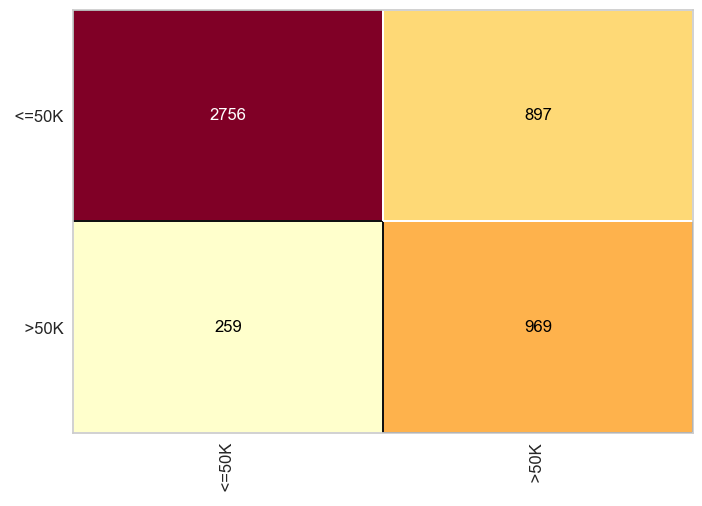

In [13]:
cm = ConfusionMatrix(knn_census_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

### ↬ **Entrega Final (Tuning + CV)** 

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
X_census_smote = np.concatenate((X_census_training_set_smote, X_census_test_set_smote), axis = 0)
y_census_smote = np.concatenate((y_census_training_set_smote, y_census_test_set_smote), axis = 0)
X_census_smote.shape, y_census_smote.shape

((46971, 41), (46971,))

In [16]:
parameters = {
    'n_neighbors': [3, 5, 10, 20, 30, 50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3],
    'leaf_size': [10, 30, 50]
}

In [54]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_census_smote, y_census_smote)
best_params = grid_search.best_params_
win = grid_search.best_score_

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

In [55]:
best_params, win

({'algorithm': 'auto',
  'leaf_size': 10,
  'n_neighbors': 5,
  'p': 1,
  'weights': 'distance'},
 0.8367088342258253)

In [23]:
knn_census_smote_gs = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=1, leaf_size=10)
knn_census_smote_gs.fit(X_census_training_set_smote, y_census_training_set_smote)

KNeighborsClassifier(leaf_size=10, p=1, weights='distance')

In [25]:
predictor_smote_gs = knn_census_smote_gs.predict(X_census_test_set_smote)
predictor_smote_gs

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [26]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [28]:
accuracy_score(y_census_test_set_smote, predictor_smote_gs)

0.7877484122106125

In [29]:
print(classification_report(y_census_test_set_smote, predictor_smote_gs))

              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.86      3653
        >50K       0.58      0.60      0.59      1228

    accuracy                           0.79      4881
   macro avg       0.72      0.72      0.72      4881
weighted avg       0.79      0.79      0.79      4881



0.7877484122106125

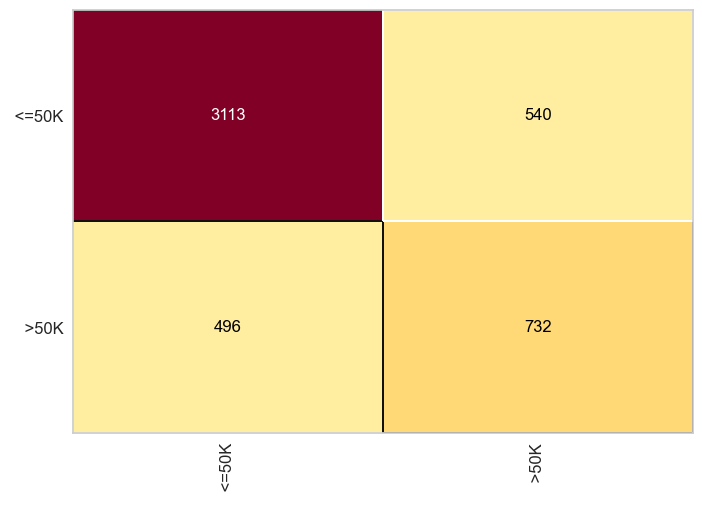

In [30]:
cm = ConfusionMatrix(knn_census_smote_gs)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

In [31]:
from sklearn.model_selection import cross_val_score, KFold

In [34]:
results_knn = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    knn_cv =  KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=1, leaf_size=10)
    scores = cross_val_score(knn_cv, X_census_smote, y_census_smote, cv=kfold)

    results_knn.append(scores.mean())

In [35]:
results_knn

[0.8379213093364214,
 0.8381129572574834,
 0.8359626168275123,
 0.8368994302949456,
 0.8373676104409098,
 0.8377935410345435,
 0.8371763658460474,
 0.8379850892569942,
 0.8385813685229552,
 0.8370270082631116,
 0.8375166462692372,
 0.8377083349760944,
 0.8380063885057292,
 0.8372611187289912,
 0.8368992308977233,
 0.8365797874842533,
 0.8370910374302121,
 0.8384323190993627,
 0.837240032472744,
 0.8376871807435213,
 0.8372611006019712,
 0.8376232512750319,
 0.8386663479936516,
 0.8367076464212323,
 0.8382407210276064,
 0.8379426674979717,
 0.8374313586391974,
 0.8377722689763392,
 0.8370057724589474,
 0.8391133195259821]

In [36]:
X_census_sm = np.concatenate((X_census_test_set_smote, X_census_training_set_smote), axis= 0)
y_census_sm = np.concatenate((y_census_test_set_smote, y_census_training_set_smote), axis=0)

In [37]:
classifier_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=1, leaf_size=10)
classifier_knn.fit(X_census_sm, y_census_sm)

KNeighborsClassifier(leaf_size=10, p=1, weights='distance')

In [38]:
pk.dump(classifier_knn, open('knn_finished.sav', 'wb'))